<a href="https://colab.research.google.com/github/ucfilho/Fer_Calsoni/blob/master/Boiler_Part_04_open_Fer_set_13_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# carrega as bibliotecas do python

In [0]:
%matplotlib inline
from matplotlib import pyplot as plt
import os
from pandas import read_excel
import numpy as np
from sklearn.decomposition import PCA

In [0]:
# carrega o arquivo de nome Fernando_Caldeira_1_maio_10_2019.xlsx (tem q usar este nome)

In [0]:
from google.colab import files
def getLocalFiles():
    _files = files.upload()
    if len(_files) >0:
       for k,v in _files.items():
         open(k,'wb').write(v)
getLocalFiles()

Saving Fernando_Caldeira_1_maio_10_2019.xlsx to Fernando_Caldeira_1_maio_10_2019 (4).xlsx


In [0]:
# leitura dos dados 

In [0]:
# find your sheet name at the bottom left of your excel file and assign 
# it to sheet_name
my_sheet = 'Planilha1'
file_name = 'Fernando_Caldeira_1_maio_10_2019.xlsx' # name of your excel file
df = read_excel(file_name, sheet_name = my_sheet)
print(df.head(3)) # shows headers with top 5 rows

        Data      TC  Patm\n  Vaz_Vap  ...  Cinzas  PCI_Cinzas  Temp_Desc  TC_Gases
0 2017-12-01  505.19   67.88    71.66  ...   94.04       791.0      110.0    194.97
1 2017-12-02  503.29   68.03    66.34  ...   92.92       747.0      110.0    194.00
2 2017-12-03  512.39   68.00    79.83  ...   92.26       793.0      110.0    194.00

[3 rows x 19 columns]


In [0]:
# Une as colunas que fara um estudo

In [0]:
X=df.drop(['Data'], axis=1)
print(X.head(3)) # shows headers with top 5 rows

       TC  Patm\n  Vaz_Vap  Vaz_agua  ...  Cinzas  PCI_Cinzas  Temp_Desc  TC_Gases
0  505.19   67.88    71.66     75.45  ...   94.04       791.0      110.0    194.97
1  503.29   68.03    66.34     69.80  ...   92.92       747.0      110.0    194.00
2  512.39   68.00    79.83     83.14  ...   92.26       793.0      110.0    194.00

[3 rows x 18 columns]


In [0]:
# Busca de dados sujos

In [0]:
print(X.isnull().any())

TC               True
Patm\n           True
Vaz_Vap          True
Vaz_agua         True
Agua_Vapor       True
Perc_Descarga    True
Pressao_01\n     True
Pressao_02\n     True
Perc_Abertura    True
TC_Fornalha      True
Oxigenio         True
H20_Biom         True
PCI_Biomas       True
Escesso_Ar       True
Cinzas           True
PCI_Cinzas       True
Temp_Desc        True
TC_Gases         True
dtype: bool


In [0]:
# Limpeza dos dados

In [0]:
X=X.dropna()
print(X.isnull().any())

TC               False
Patm\n           False
Vaz_Vap          False
Vaz_agua         False
Agua_Vapor       False
Perc_Descarga    False
Pressao_01\n     False
Pressao_02\n     False
Perc_Abertura    False
TC_Fornalha      False
Oxigenio         False
H20_Biom         False
PCI_Biomas       False
Escesso_Ar       False
Cinzas           False
PCI_Cinzas       False
Temp_Desc        False
TC_Gases         False
dtype: bool


In [0]:
# Apos limpar os dados q tem NaN
pca = PCA(n_components=2)
pca.fit(X)  

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

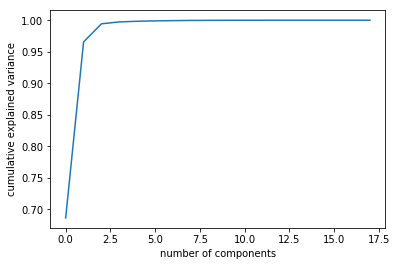

In [0]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [0]:


ENTRADA
Oxigenio         True
H20_Biom         True
PCI_Biomas       True
Escesso_Ar       True
Vaz_agua         True

SAIDA:
TC               True
Patm\n           True
Vaz_Vap          True
Agua_Vapor       True
Perc_Descarga    True
Pressao_01\n     True
Pressao_02\n     True
Perc_Abertura    True
TC_Fornalha      True
PCI_Cinzas       True
Temp_Desc        True
TC_Gases         True
Cinzas           True

